In [ ]:
import cv2
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

Step :1 Data load

Objective: Load image and labels from the dataset directory

Explanation:

. We load all images from subfolders

. Resize all images to (64,64) for uniformity

. Store images in X and corresponding labels in Y

In [ ]:
import os
data_dir = '/content/drive/MyDrive/Colab Notebooks/day 1/Plant Diseases'
categories = os.listdir(data_dir)

#Load images and labels
images = []
labels = []

for category in categories:
  #print(category)
  folder_path = os.path.join(data_dir, category)
  for img_file in os.listdir(folder_path):
    img_path = os.path.join(folder_path, img_file)
    img = cv2.imread(img_path)
    if img is not None:
      img = cv2.resize(img, (64,64))  #Resize to uniform size
      images.append(img)
      labels.append(category)

#convert to numpy arrays
X = np.array(images)
Y = np.array(labels)
print("labels:",np.unique(Y))
print("Data shapes:",X.shape)

labels: ['Pepper__bell___Bacterial_spot' 'Pepper__bell___healthy'
 'Potato___Early_blight' 'Potato___Late_blight' 'Potato___healthy']
Data shapes: (740, 64, 64, 3)


Step 2: Data Description

Expalnation:

. We count how many images are in in each row


Class Distribution
Potato___Late_blight             280
Pepper__bell___healthy           220
Pepper__bell___Bacterial_spot    120
Potato___Early_blight             60
Potato___healthy                  60
Name: count, dtype: int64


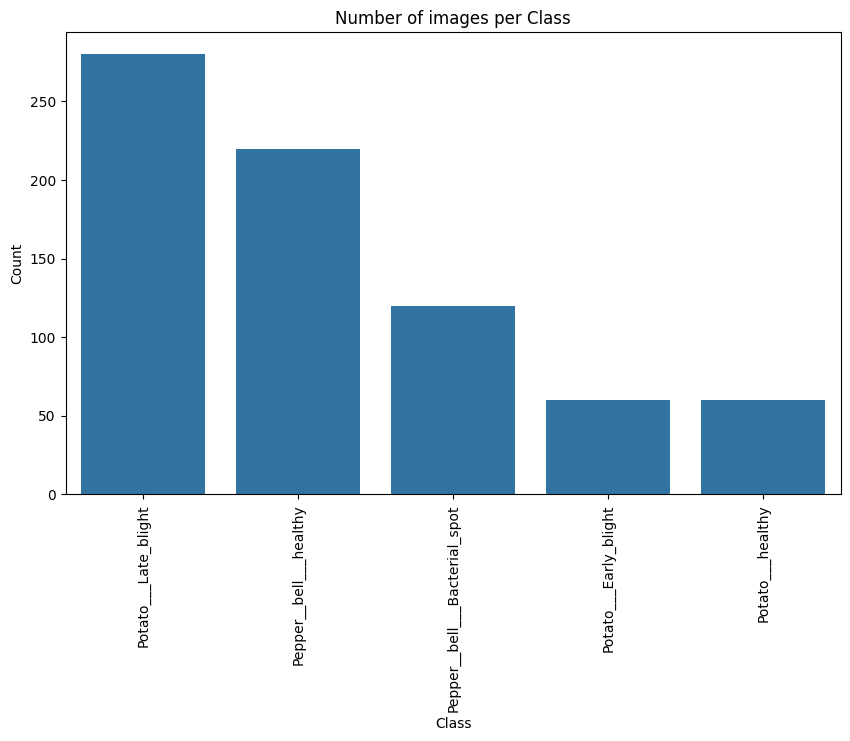

In [ ]:
# count images per class
class_counts = pd.Series(labels).value_counts()
print("Class Distribution")
print(class_counts)

#plot class distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xticks(rotation=90)
plt.title("Number of images per Class")
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

step 3: Data Cleaning

Explanation:

. Ensure all images are valid and of the same shape

. Remove corrupted or misshape images

In [ ]:
#Remove corrupted images (if any)
valid_images = []
valid_labels = []

for img, label in zip(X, Y):
  if img.shape == (64,64,3): # ensure all images are valid
    valid_images.append(img)
    valid_labels.append(label)

X = np.array(valid_images)
Y = np.array(valid_labels)

print("Cleaned Data Shape:", X.shape)

Cleaned Data Shape: (740, 64, 64, 3)


step 4: Data manipulation

Explanation:

.labelEncoded()converts string labels like 'Apple_Apple_scab' to numeric values(e.g 0,1,2)

.Class name stores original labels for later interpretation

In [ ]:
# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(Y)

#Save class name for later use
class_names = le.classes_
print(y_encoded)


[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

Step 5: Visualization

Explanation:

.Display 9 random images from the dataset

.Helps visually inspect the different between classes

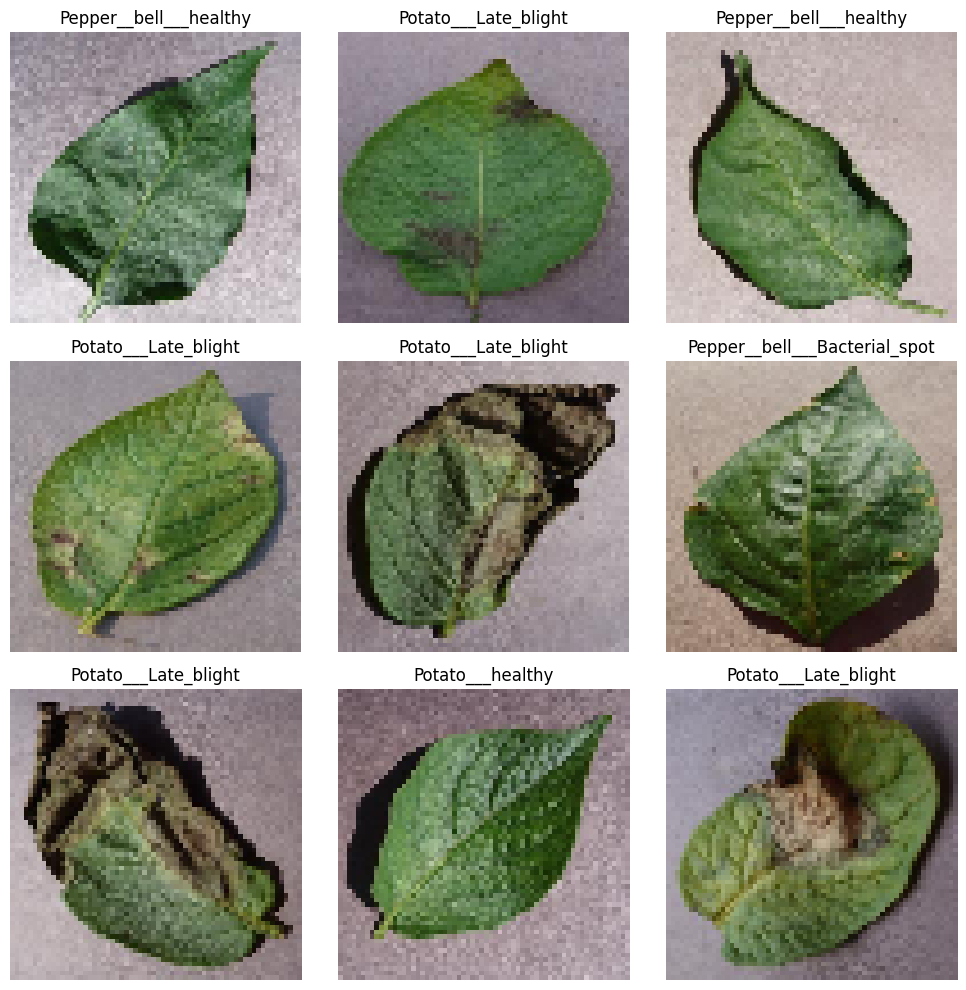

In [ ]:
#Show sample images
import random

plt.figure(figsize=(10,10))
for i in range(9):
  idx = random.randint(0, len(X))
  plt.subplot(3,3, i+1)
  plt.imshow(cv2.cvtColor(X[idx], cv2.COLOR_BGR2RGB)) # Convert BGR to RGB
  plt.title(class_names[y_encoded[idx]])
  plt.axis('off')
plt.tight_layout()
plt.show()

Step :6 Feature engineering (color histogram)

Explanation:

.Conerts each image to HSV color space

.Computes 3D histogram (Hue, Staturation, Value)

In [ ]:
def extract_color_histogram(image, bins=(8,8,8)):
  # Convert to HSV color space
  image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
  hist = cv2.calcHist([image], [0,1,2], None, bins, [0,256,0,256,0,256])
  hist = cv2.normalize(hist, hist).flatten()
  return hist

#Extract features
hist_features =[extract_color_histogram(img) for img in X]
X_features = np.array(hist_features)

step 7: Model Selection : Logistic Regression/SVM

Expalnaion:

. SVM (Support vector Machine) is good for high-dimensional data like histograms

.kernel='rbf' - Radial Basis Function kernel

. C= 10- Regularization parameter

. gamma='scale' - kernel coefficient

In [ ]:
# choose model
# model = LogisticRegression(max_iter=1000)
model = SVC(kernel='rbf', C=10, gamma='scale')

Step 8: Training the Model

Explanation:

. train_test_splict:Splits data into 80% train, 20% test

. model.fit:Trains the model

. model.predict: Predicts on the data

In [ ]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_encoded, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

 Step 9: Model Evaluation

Accuracy: 0.9324324324324325
F1 Score: 0.9306995893816119


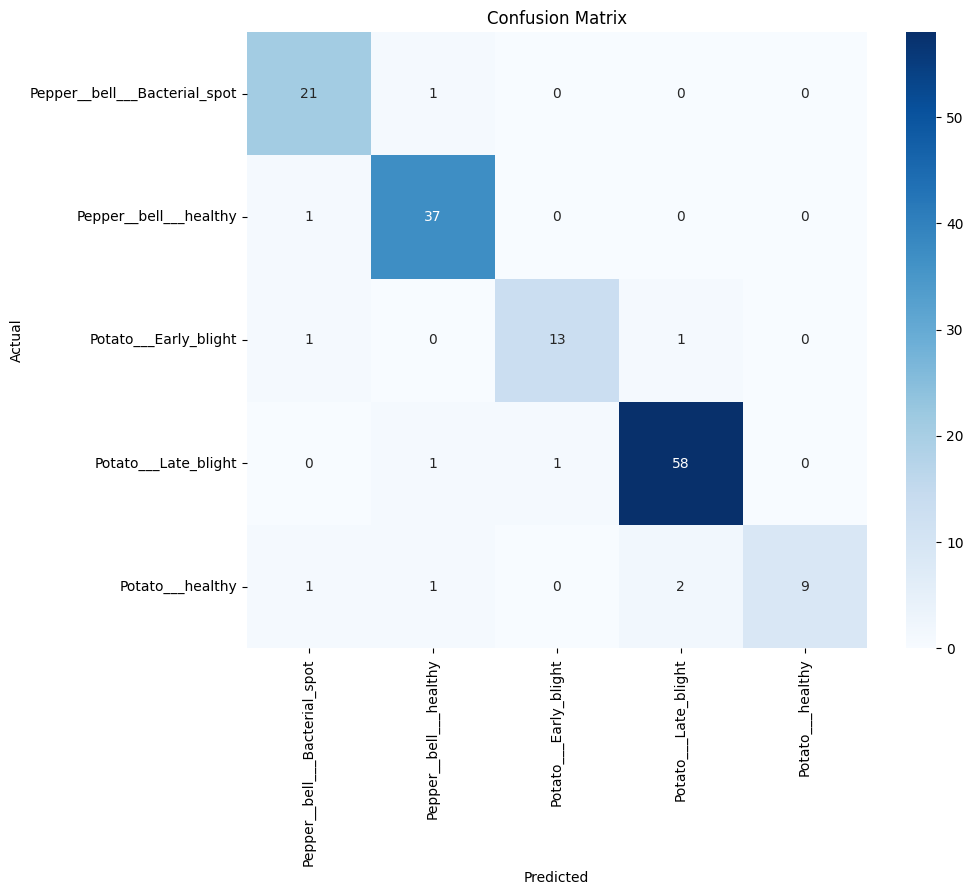

Classification Report:
                                precision    recall  f1-score   support

Pepper__bell___Bacterial_spot       0.88      0.95      0.91        22
       Pepper__bell___healthy       0.93      0.97      0.95        38
        Potato___Early_blight       0.93      0.87      0.90        15
         Potato___Late_blight       0.95      0.97      0.96        60
             Potato___healthy       1.00      0.69      0.82        13

                     accuracy                           0.93       148
                    macro avg       0.94      0.89      0.91       148
                 weighted avg       0.93      0.93      0.93       148



In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, f1_score

#Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)


#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

#Plot Confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

#classification report
cr = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:\n", cr)